# Visualizing dyad
Consider an image from `skimage.data`. For simplicity, say that $X \in \mathbb{R}^{m \times n}$ is the matrix representing that image. You are asked to visualize the dyad of the SVD Decomposition of $X$ and the result of compressing the image via SVD. In particular:

* Load the image into memory and compute its SVD;
* Visualize some of the dyad $\sigma_i u_i v_i^T$ of this decomposition. What do you notice?
* Plot the singular values of $X$. Do you note something?
* Visualize the $k$-rank approximation of $X$ for different values of $k$. What do you observe?
* Compute and plot the approximation error $|| X − X_k ||_F$ for increasing values of $k$, where $X_k$ is the $k$-rank approximation of $k$.
* Plot the compression factor: $c_k = 1 − \frac{k(m+n+1)}{mn}$ for increasing values of $k$.
* Compute the value $k$ such that $c_k = 0$ (i.e. when the compressed image requires the same amount of informations of those of the uncompressed image). What is the approximation error for this value of $k$? Comment.

It is strongly recommended (but not mandatory) to consider a grey-scale image for this exercise. You can also use an image downloaded from the web. Clearly, if your image will be an RGB image, then its shape will be `(m, n, 3)`, where the last dimension corresponds to the three channels (Red, Green, and Blue). Every point discussed in the Homework has to be done on each channel separately, and then aggregated back to an RGB image.

## Import all packages


In [87]:
import skimage
from skimage import img_as_float
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

## Load the image


Shape of the image: (512, 512).


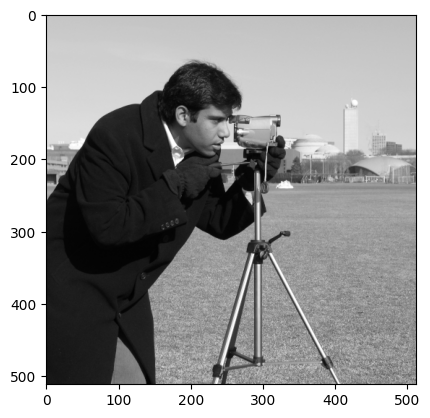

In [103]:
image = img_as_float(skimage.data.camera())
print(f"Shape of the image: {image.shape}.")
plt.imshow(image, cmap="gray")
plt.show()

## Compute the SVD

In [127]:
U, s, VT = np.linalg.svd(image, full_matrices=True)
print(U.shape, s.shape, VT.shape)
print(s)

(512, 512) (512,) (512, 512)
[2.78298176e+02 6.68807493e+01 5.22152965e+01 3.46565274e+01
 2.30377427e+01 1.70625345e+01 1.46238417e+01 1.36269750e+01
 1.33797692e+01 1.18849970e+01 1.06568790e+01 1.02626843e+01
 9.80407038e+00 8.61051117e+00 8.19417079e+00 8.06515051e+00
 7.18266413e+00 7.04399448e+00 6.70224552e+00 6.60635529e+00
 6.49673779e+00 6.16080293e+00 5.97681799e+00 5.79240103e+00
 5.65424795e+00 5.29116672e+00 5.01156401e+00 4.83507797e+00
 4.68413583e+00 4.45532693e+00 4.40116176e+00 4.16904056e+00
 4.12533396e+00 4.05023263e+00 3.93472548e+00 3.85463050e+00
 3.67555760e+00 3.59201878e+00 3.51228884e+00 3.47164435e+00
 3.38679663e+00 3.32993457e+00 3.26811214e+00 3.24184928e+00
 3.19585748e+00 3.14462402e+00 3.09830742e+00 3.08448888e+00
 3.05355715e+00 2.96955849e+00 2.92555459e+00 2.87556078e+00
 2.84522741e+00 2.78548681e+00 2.73322047e+00 2.68372565e+00
 2.66781909e+00 2.62513547e+00 2.53239067e+00 2.49916625e+00
 2.47573242e+00 2.45088372e+00 2.40908031e+00 2.33889004

## Visualize dyad

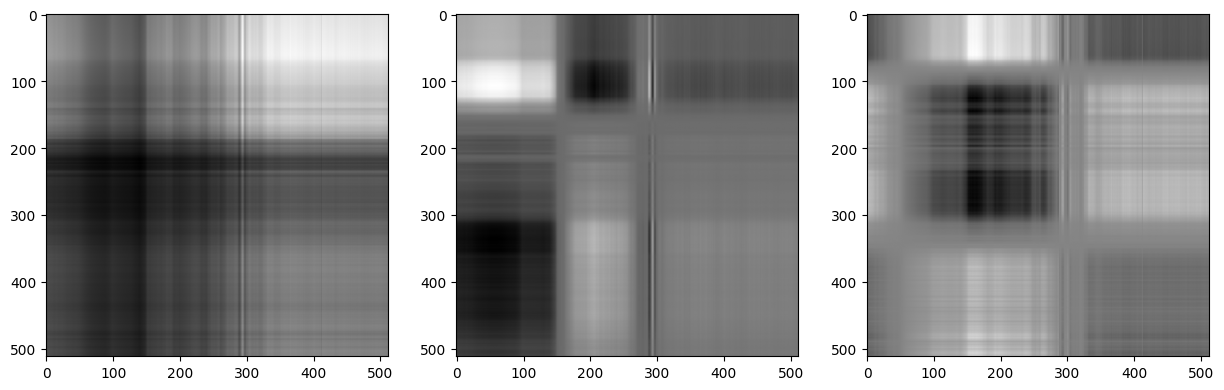

 The first one has the highest singular value, the second one has the second highest singular value, and so on. 


In [109]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    dyad = np.outer(U[:, i], VT[i, :])
    ax.imshow(dyad, cmap="gray")
plt.show()
comment = """ The first one has the highest singular value, the second one has the second highest singular value, and so on. """
print(comment)

## Plot singular values

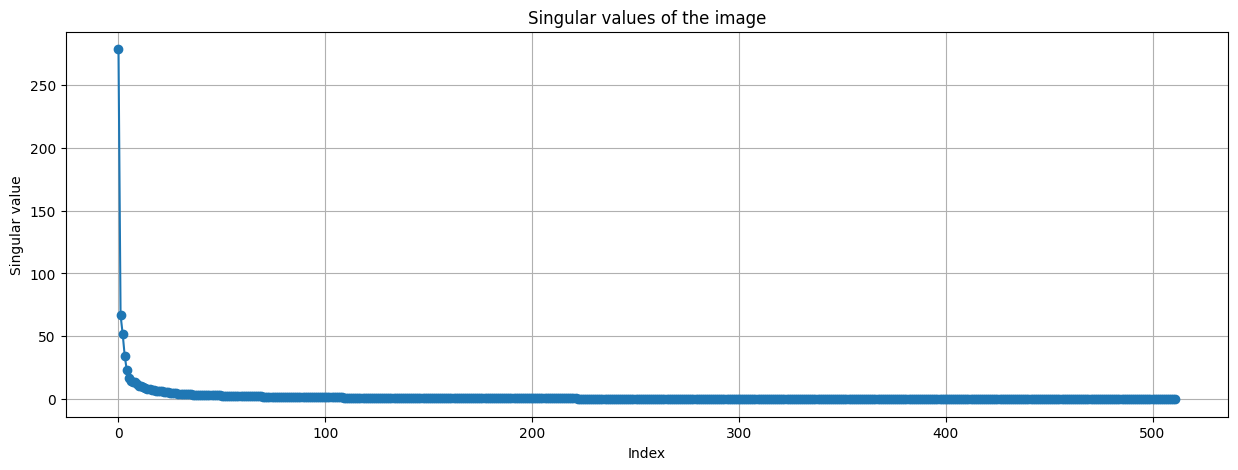

 As the singular value matrix had the singular values on the diagonal, we can see that the singular values are in decreasing order.
This is a common property of singular values. 


In [107]:
plt.figure(figsize=(15, 5))
plt.plot(s,'-o' ,linewidth=1.5)
plt.title("Singular values of the image")
plt.xlabel("Index")
plt.ylabel("Singular value")
plt.grid()
plt.show()
comment = """ As the singular value matrix had the singular values on the diagonal, we can see that the singular values are in decreasing order.
This is a common property of singular values. """
print(comment)

## K - rank approximation

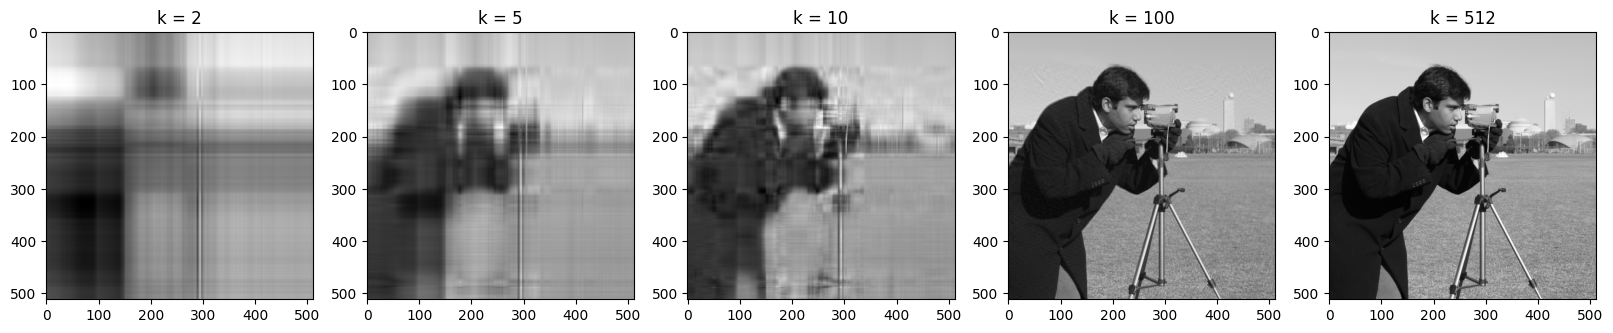

 As we can see, the image is getting more and more blurry as we decrease the rank of the image. 
This is because we are removing the high frequency components of the image. k-rank is connected to the rank of the S-matrix.


In [ ]:
def k_rank(U,s,VT,k):
    return U[:,:k] @ np.diag(s[:k]) @ VT[:k,:]

k_values = [2,5,10,100,500]
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, k in enumerate(k_values):
    image_k = k_rank(U,s,VT,k)
    axes[i].imshow(image_k, cmap="gray")
    axes[i].set_title(f"k = {k}")
plt.show()
comment = """ As we can see, the image is getting more and more blurry as we decrease the rank of the image. 
This is because we are removing the high frequency components of the image. k-rank is connected to the rank of the S-matrix."""
print(comment)

## Approximation error

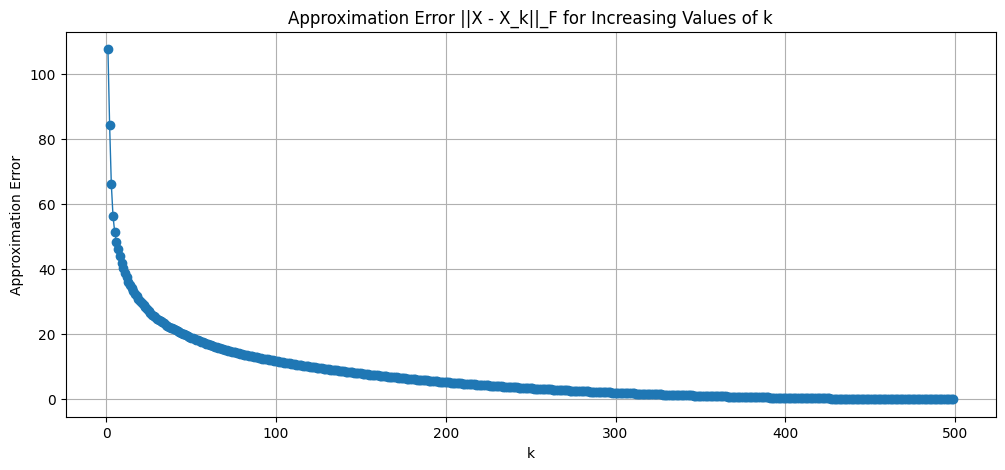

In [120]:
def approx_error(U,s,VT,k):
    x_k = k_rank(U,s,VT,k)
    return np.linalg.norm(image - x_k,'fro')

# Compute the approximation errors for different k values
k_values = range(1,500)
errors = [approx_error(U,s,VT,k) for k in k_values]

plt.figure(figsize=(12, 5))
plt.plot(k_values, errors, '-o', linewidth=1.0)
plt.title('Approximation Error ||X - X_k||_F for Increasing Values of k')
plt.xlabel('k')
plt.ylabel('Approximation Error')
plt.grid()
plt.show()


## Compression factor 

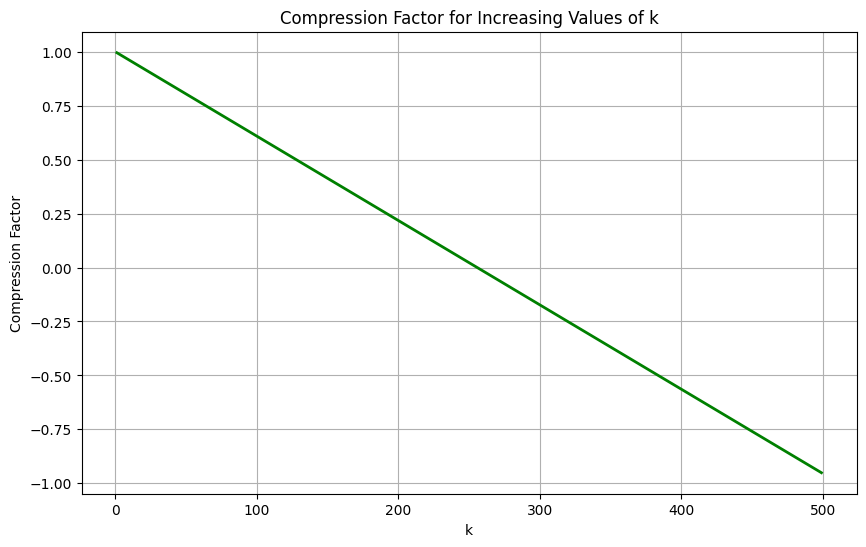

In [119]:
def compression_factor(m, n, k):
    return 1 - (k * (m + n + 1)) / (m * n)

# dimensions of image
m, n = image.shape

# Compute the compression factor for increasing values of k
compression_factors = [compression_factor(m, n, k) for k in k_values]

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(k_values, compression_factors, 'g-', linewidth=2)
plt.title('Compression Factor for Increasing Values of k')
plt.xlabel('k')
plt.ylabel('Compression Factor')
plt.grid()
plt.show()


## Compute the k value s.t. $c_{k}=0$

In [121]:
k_zero_compression = m * n / (m + n + 1)

# Determine the approximation error for this value of k
error_zero_compression = approx_error(U, s, VT, int(k_zero_compression))

# Print the results
print(f"Value of k for zero compression factor: {int(k_zero_compression)}")
print(f"Approximation error for k = {int(k_zero_compression)}: {error_zero_compression}")

# Comment on the results
comment = """
The value of k for which the compression factor c_k is zero is equal to the number of singular values required to represent the image without any compression. 
The approximation error for this value of k is expected to be very small, indicating that the k-rank approximation is very close to the original image.
"""
print(comment)

Value of k for zero compression factor: 255
Approximation error for k = 255: 3.209575380605604

The value of k for which the compression factor c_k is zero is equal to the number of singular values required to represent the image without any compression. 
The approximation error for this value of k is expected to be very small, indicating that the k-rank approximation is very close to the original image.



# Classification of MNIST Digits with SVD Decomposition

1. Implement the binary classification algorithm discussed above for the digits 3 and 4 of MNIST dataset. Follow these steps:
   * Download the MNIST dataset from [kaggle.com/datasets/animatronbot/mnist-digit-recognizer](https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer) and load it into memory by following the steps we did in the [PCA class](https://devangelista2.github.io/statistical-mathematical-methods/ML/PCA.html). When loaded into memory, this dataset appear as an array with shape $42000 \times 785$ , containining the flattened version of $42000$ $28 \times 28$ grayscale handwritten digits, plus a column representing the true class of the corresponding digit. By pre-processing the data as we did in class, you should obtain a matrix `X` containing the flattenened digits, with shape `(784, 42000)`, and a vector `Y` of the associated digit value, with a shape of `(42000,)`.
   * Write a function taking as input an index value `idx` and visualizes the image of `X` in the corresponding index (i.e. `X[idx, :]`). Use the function `plt.imshow`.
   * Filter from `X` only those elements that corresponds to digits 3 or 4. This can be done, for example, by using the boolean slicing of `numpy` arrays, as already discussed in class.
   * Split the obtained dataset in training and testing in a proportion of $80 : 20$. From now on, we will only consider the training set. The test set will be only used at the end of the exercise to test the algorithm.
   * Call `X1` and `X2` the submatrices of the training set, filtered by the two selected digits, corresponding to those element associated with number 3 (class `C1`), and with number 4 (class `C2`).
   * Compute the SVD decomposition of `X1` and `X2` with `np.linalg.svd(matrix, full_matrices=False)` and denote the $U$-part of the two decompositions as `U1` and `U2`.
   * Take an unknown digit $x$ from the test set, and compute $x_1^\perp = U_1(U_1^T x)$ and $x_2^\perp = U_2(U_2^T x)$.
   * Compute the distances $d_1 = || x − x_1^\perp ||_2$ and $d_2 = || x − x_2^\perp||_2$, and classify $x$ as $C_1$ if $d_1 < d_2$, as $C_2$ if $d_2 < d_1$.
   * Repeat the experiment for different values of $x$ in the test set. Compute the misclassification rate for this algorithm.
   * Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of the digits and the classification error?
   * Comment the obtained results.

## Seperate test and training data

#

(784, 42000) (42000,)


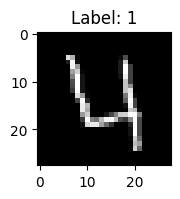

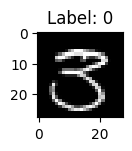

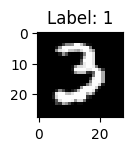

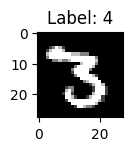

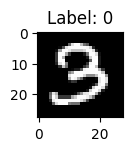

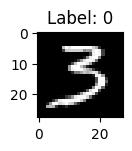

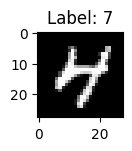

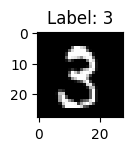

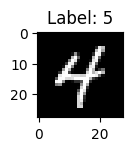

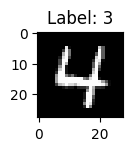

Accuracy: 99.05% for the first test


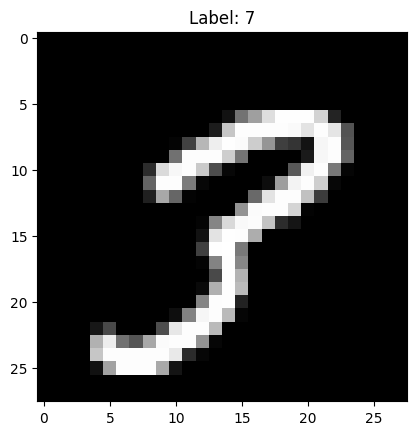

Predicted: 4, Actual: 3


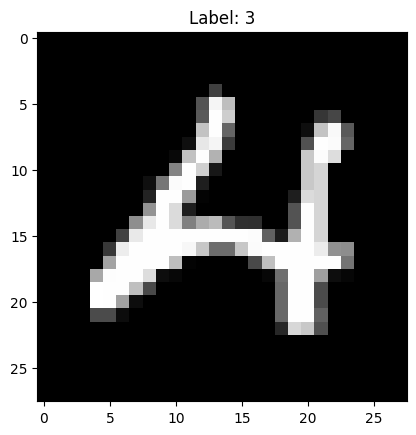

Predicted: 3, Actual: 4


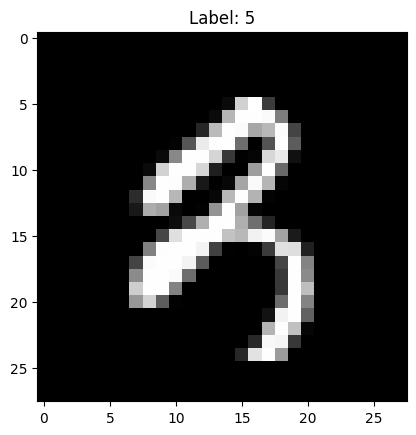

Predicted: 4, Actual: 3


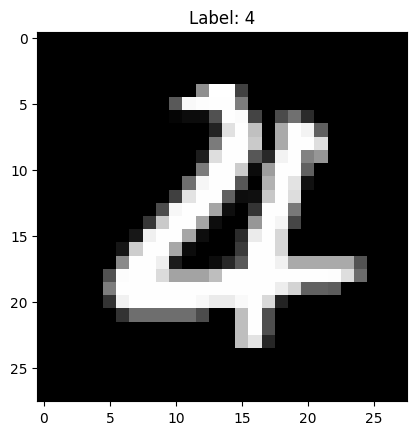

Predicted: 3, Actual: 4


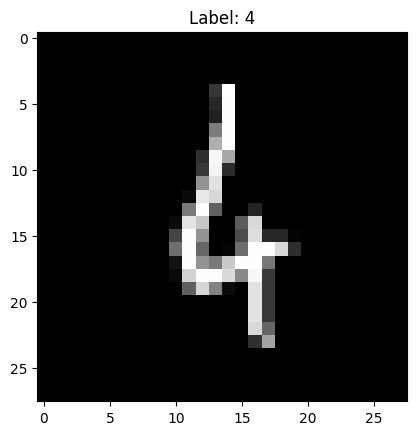

Predicted: 3, Actual: 4


In [122]:
data = pd.read_csv("data/train.csv")
data.shape
# Convert data into a matrix
data = np.array(data)
# Digits that are interesting
n1 = 3
n2 = 4
X = data[:, 1:]
X = X.T

Y = data[:, 0]
print(X.shape, Y.shape)
d, N = X.shape

# Visualize the image 
def visualize_image(X, index):
    image = X[:, index].reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {Y[index]}")
    plt.show()
    
# Filter digits 3 and 4
indices = np.where((Y == n1) | (Y == n2))[0]
X_filtered = X[:, indices]
Y_filtered = Y[indices]
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    visualize_image(X_filtered, i)
#plt.show()
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered.T, Y_filtered, test_size=0.2, random_state=42)

X_train = X_train.T
X_test = X_test.T

X1 = X_train[:, Y_train == n1]
X2 = X_train[:, Y_train == n2]

U1, s1, VT1 = np.linalg.svd(X1, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2, full_matrices=False)

# Classify the digits
def classify_digit(x):
    x1_perp = U1 @ (U1.T @ x)
    x2_perp = U2 @ (U2.T @ x)
    d1 = np.linalg.norm(x - x1_perp)
    d2 = np.linalg.norm(x - x2_perp)
    return n1 if d1 < d2 else n2

#test the classifier
predictions = [classify_digit(X_test[:, i]) for i in range(X_test.shape[1])]
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}% for the first test")

# Visualize some misclassified examples
misclassified_indices = np.where(predictions != Y_test)[0]
for idx in misclassified_indices[:5]:
    visualize_image(X_test, idx)
    print(f"Predicted: {predictions[idx]}, Actual: {Y_test[idx]}")
    





# PCA


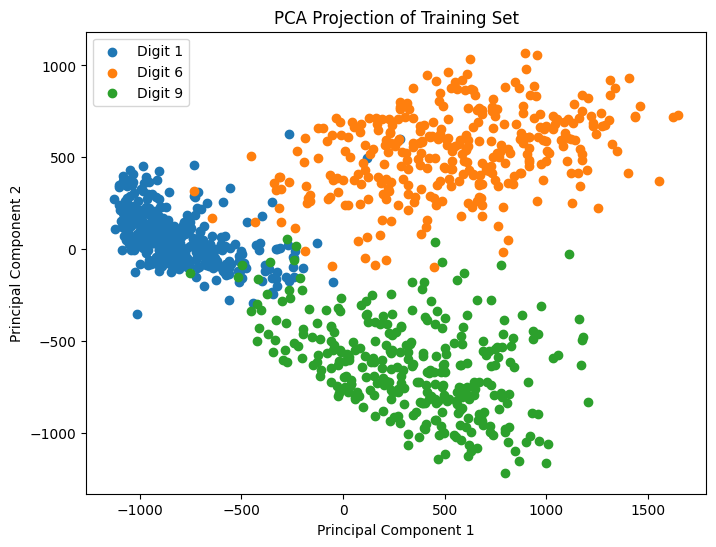

Average distances from centroids: {1: np.float64(156.2268635866027), 6: np.float64(269.1502356267095), 9: np.float64(254.69895767915295)}
Test set average distances from centroids: {1: np.float64(153.49155348398168), 6: np.float64(276.6077992273107), 9: np.float64(253.79787446182533)}
Misclassification rate: 5.53%
Misclassification rate for k=2: 5.53%
Misclassification rate for k=3: 5.44%
Misclassification rate for k=5: 4.60%
Misclassification rate for k=10: 4.15%
Misclassification rate for k=20: 3.81%
 The misclassification rate decreases as we increase the number of principal components used in the PCA. For the digits 1,6,9 we see that
    from the 3 cluster that 6 and 9 are more similar to each other than to 1. 


In [126]:
data = pd.read_csv("data/train.csv")
data = np.array(data)
X = data[:, 1:].T
Y = data[:, 0]

digits = [1,6,9]
mask = np.isin(Y, digits)
X_filtered = X[:, mask]
Y_filtered = Y[mask]

N_train = 1000
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered.T, Y_filtered, train_size=N_train, random_state=42)
X_train = X_train.T
X_test = X_test.T

# Perform PCA
k = 2
pca = PCA(n_components=k)
Z_train = pca.fit_transform(X_train.T).T

# Visualize the results
plt.figure(figsize=(8, 6))
for digit in digits:
    indices = np.where(Y_train == digit)
    plt.scatter(Z_train[0, indices], Z_train[1, indices], label=f'Digit {digit}')
plt.legend()
plt.title('PCA Projection of Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Compute centroids
centroids = {}
for digit in digits:
    indices = np.where(Y_train == digit)
    centroids[digit] = np.mean(Z_train[:, indices], axis=2).flatten()

# Compute average distance from centroid
avg_distances = {}
for digit in digits:
    indices = np.where(Y_train == digit)
    distances = np.linalg.norm(Z_train[:, indices].T - centroids[digit], axis=1)
    avg_distances[digit] = np.mean(distances)
print("Average distances from centroids:", avg_distances)

# Project test set
Z_test = pca.transform(X_test.T).T

# Compute average distance to centroids for test set
test_avg_distances = {}
for digit in digits:
    indices = np.where(Y_test == digit)
    distances = np.linalg.norm(Z_test[:, indices].T - centroids[digit], axis=1)
    test_avg_distances[digit] = np.mean(distances)
print("Test set average distances from centroids:", test_avg_distances)

def classify_digit(x):
    distances = {digit: np.linalg.norm(x - centroids[digit]) for digit in digits}
    return min(distances, key=distances.get)

# Test the classifier
predictions = [classify_digit(Z_test[:, i]) for i in range(Z_test.shape[1])]
accuracy = accuracy_score(Y_test, predictions)
print(f"Misclassification rate: {100 - accuracy * 100:.2f}%")

# Repeat the experiment for different values of k and different digits
ks = [2, 3,5,10,20]
for k in ks:
    pca = PCA(n_components=k)
    Z_train = pca.fit_transform(X_train.T).T
    Z_test = pca.transform(X_test.T).T

    # Compute centroids
    centroids = {}
    for digit in digits:
        indices = np.where(Y_train == digit)
        centroids[digit] = np.mean(Z_train[:, indices], axis=2).flatten()

    # Define classification algorithm
    def classify_digit(x):
        distances = {digit: np.linalg.norm(x - centroids[digit]) for digit in digits}
        return min(distances, key=distances.get)

    # Test the classifier
    predictions = [classify_digit(Z_test[:, i]) for i in range(Z_test.shape[1])]
    accuracy = accuracy_score(Y_test, predictions)
    print(f"Misclassification rate for k={k}: {100 - accuracy * 100:.2f}%")
    
    
comment = """ The misclassification rate decreases as we increase the number of principal components used in the PCA. For the digits 1,6,9 we see that
    from the 3 cluster that 6 and 9 are more similar to each other than to 1. """
print(comment)